In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
import pandas_market_calendars as mcal

In [2]:
df_data=pd.read_excel('https://github.com/GuillaumePv/DS_1mscF/raw/main/Data/agregatedData_final.xlsx')

In [3]:
df_data.columns

Index(['Unnamed: 0', 'Instrument', 'Price Close', 'P/E', 'ROE', 'Volume',
       'Company Market Cap', 'Spread Bid-Ask', 'growth Total NAV',
       'Total Volume', 'Adj Close', 'Date'],
      dtype='object')

In [4]:
df_data['Date']=pd.to_datetime(df_data['Date'])

In [5]:
df_data=df_data.set_index('Date')

In [6]:
df_data.index

DatetimeIndex(['2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03',
               '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09',
               '2015-03-10', '2015-03-11',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=602051, freq=None)

In [7]:
#getting the number of tradable day
#earliest Date
start_date=df_data.index.min()
print("the sample begin on the,",start_date,)
#oldest date
end_date=df_data.index.max()
print("the sample end on the,",end_date,)
windows=end_date-start_date
print("Resulting in a windows of",windows)
nyse = mcal.get_calendar('NYSE')
traddays=nyse.schedule(start_date=start_date, end_date=end_date)
nnumb_trad_days=len(traddays)
print("But a windows of ",nnumb_trad_days,"tradable days")

the sample begin on the, 2006-01-04 00:00:00
the sample end on the, 2019-12-31 00:00:00
Resulting in a windows of 5109 days 00:00:00
But a windows of  3522 tradable days


In [8]:
df_data=df_data.drop(['Unnamed: 0'], axis=1)

In [9]:
#df_data=df_data.drop(['Spread Bid-Ask'], axis=1)

In [10]:
df_data.head()

,Instrument,Price Close,P/E,ROE,Volume,Company Market Cap,Spread Bid-Ask,growth Total NAV,Total Volume,Adj Close
Date,,,,,,,,,,
2015-02-26,AAL.OQ,49.35,12.545217,150.8208,1300627,3.437967e+10,0.01,-0.001310,78142400,-0.001476
2015-02-27,AAL.OQ,47.90,12.176614,150.8208,1699608,3.336953e+10,0.01,-0.002951,112975100,-0.002956
2015-03-02,AAL.OQ,48.31,12.280840,150.8208,2928631,3.365515e+10,0.01,0.006166,96821900,0.006125
2015-03-03,AAL.OQ,48.77,12.397776,150.1054,1926757,3.397561e+10,0.01,-0.004506,114851200,-0.004539
2015-03-04,AAL.OQ,48.95,12.443534,150.1054,1551096,3.410101e+10,0.01,-0.004180,120790500,-0.004389


In [11]:
df_describe =df_data.describe()

In [12]:
df_describe.head()

,Price Close,P/E,ROE,Volume,Company Market Cap,Spread Bid-Ask,growth Total NAV,Total Volume,Adj Close
count,602051.000000,602051.000000,602051.000000,6.020510e+05,6.020510e+05,602051.000000,602051.000000,6.020510e+05,602051.000000
mean,85.648446,51.474848,21.754611,8.267973e+05,2.050218e+10,0.409181,0.000181,1.437541e+08,0.000362
std,168.935511,441.608426,91.998511,1.546402e+06,5.641280e+10,283.614452,0.016505,9.526945e+07,0.011343
min,1.592346,0.167528,-2581.620000,0.000000e+00,1.448237e+08,0.000417,-0.750790,2.429220e+07,-0.090350
25%,28.320000,17.300366,10.094000,2.245820e+05,5.064619e+09,0.010000,-0.003690,7.940890e+07,-0.003652


In [13]:
df_describe.columns

Index(['Price Close', 'P/E', 'ROE', 'Volume', 'Company Market Cap',
       'Spread Bid-Ask', 'growth Total NAV', 'Total Volume', 'Adj Close'],
      dtype='object')

In [14]:
df_describe=df_describe[['P/E','growth Total NAV','ROE','Company Market Cap','Total Volume']]
df_describe.to_excel('Describe.xlsx')

In [15]:
#plot of correlation
var_interest=df_data[df_describe.columns]

In [16]:
var_interest.corr()

,P/E,growth Total NAV,ROE,Company Market Cap,Total Volume
P/E,1.000000,0.003324,-0.004381,-0.002236,-0.010696
growth Total NAV,0.003324,1.000000,0.001325,0.004580,-0.089472
ROE,-0.004381,0.001325,1.000000,0.019427,-0.009593
Company Market Cap,-0.002236,0.004580,0.019427,1.000000,-0.102198
Total Volume,-0.010696,-0.089472,-0.009593,-0.102198,1.000000


In [17]:
sns.set(style="ticks")
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

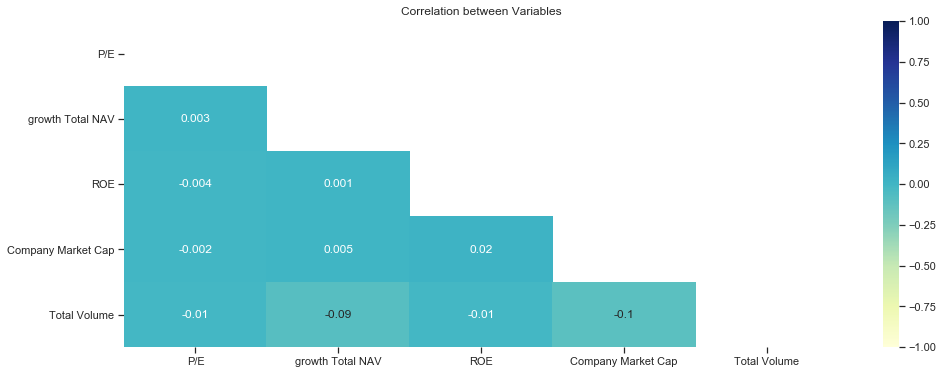

In [18]:
plt.figure(figsize=(16, 6))
plt.title('Correlation between Variables')
sns.color_palette("rocket_r")
matrix = np.triu(var_interest.corr())
heat=sns.heatmap(var_interest.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1,cmap="YlGnBu", mask=matrix)

In [19]:
#plot of before and after winsorisation
df_winsor= pd.read_excel('winsor_data.xlsx')

In [20]:
df_winsor.head()

,date,instrument,pe,roe,volume,companymarketcap,spreadbidask,companyname,entrydate,issp500,...,returnsp500,company_id,date1,log_volume,log_totalvolumeetf,log_companymarketcap,isdup,interacNAV_SP,pe_f,roe_f
0,2015-02-26,AAL.OQ,12.54522,150.8208,1300627,34380000000,0.01,American Airline,2015-03-23,0,...,-0.001476,1,2015-02-26,14.07836,19.06448,24.26073,0,0.0,12.54522,56.7595
1,2015-02-27,AAL.OQ,12.17661,150.8208,1699608,33370000000,0.01,American Airline,2015-03-23,0,...,-0.002956,1,2015-02-27,14.34591,18.78327,24.23091,0,0.0,12.17661,56.7595
2,2015-03-02,AAL.OQ,12.28084,150.8208,2928631,33660000000,0.01,American Airline,2015-03-23,0,...,0.006125,1,2015-03-02,14.89005,18.51909,24.23943,0,0.0,12.28084,56.7595
3,2015-03-03,AAL.OQ,12.39778,150.1054,1926757,33980000000,0.01,American Airline,2015-03-23,0,...,-0.004538,1,2015-03-03,14.47135,18.63805,24.24891,0,0.0,12.39778,56.7595
4,2015-03-04,AAL.OQ,12.44353,150.1054,1551096,34100000000,0.01,American Airline,2015-03-23,0,...,-0.004389,1,2015-03-04,14.25447,19.02586,24.25259,0,0.0,12.44353,56.7595


In [21]:
pe_notwins=df_winsor['pe']
pe_wins=df_winsor['pe_f']
roe_notwins=df_winsor['roe']
roe_wins=df_winsor['roe_f']

In [28]:
#sns.pairplot(var_interest)

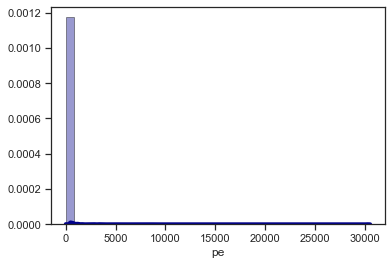

In [27]:
# Density Plot and Histogram pe not wins
sns.distplot(pe_notwins, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

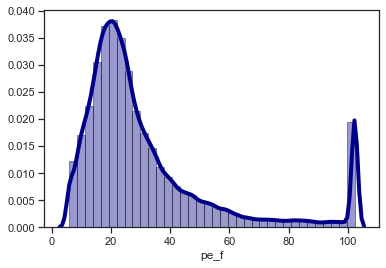

In [29]:
# Density Plot and Histogram pe wins
sns.distplot(pe_wins, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

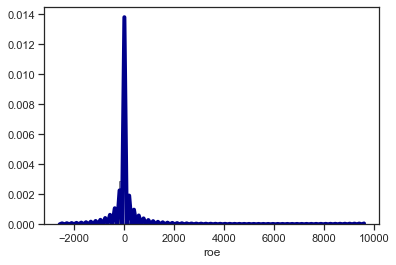

In [30]:
# Density Plot and Histogram pe not wins
sns.distplot(roe_notwins, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

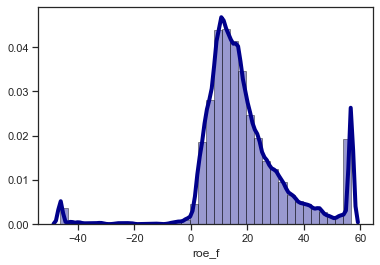

In [31]:
# Density Plot and Histogram pe wins
sns.distplot(roe_wins, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [1]:
df_trend= pd.read_csv('multiTimeline.csv',header=1)

NameError: name 'pd' is not defined

In [2]:
df_trend.rename(columns={'S&P ETF: (Dans tous les pays)': '#search per month'}, inplace=True)

NameError: name 'df_trend' is not defined

In [3]:
df_trend['Mois']=pd.to_datetime(df_trend['Mois'])

NameError: name 'pd' is not defined

In [4]:
plt.plot(df_trend.Mois,df_trend['#search per month'])
plt.legend()

NameError: name 'plt' is not defined

In [5]:
df_trend['log of search']= np.log(df_trend['#search per month'])

NameError: name 'np' is not defined

In [6]:
plt.plot(df_trend.Mois,df_trend['log of search'])

NameError: name 'plt' is not defined

In [7]:
max_date=df_trend.loc[df_trend['#search per month'].argmax()][0]

NameError: name 'df_trend' is not defined

In [8]:
max_date-pd.Timedelta(10, unit='m') 

NameError: name 'max_date' is not defined

In [9]:
x = mdates.date2num(df_trend.Mois)
y=df_trend['#search per month']
z= np.polyfit(x,y,2)
p=np.poly1d(z)

#plt.style.use('ggplot')
#plt.plot(x, p(x), "r")
plt.plot(x, y, "r")
plt.plot(df_trend.Mois,df_trend['#search per month'],'b')
plt.title('Google search for \"S&P 500 ETF\" ')
plt.xlabel('Months')
plt.ylabel('# of search')

#plt.axvline(max_date,color='k', linestyle='--')
spl_start=pd.to_datetime('2006-01-04 00:00:00')
spl_end=pd.to_datetime('2019-12-31 00:00:00')


start='2016-01-01'
start=pd.to_datetime(start)
#last date 
end=df_trend.loc[df_trend['Mois'].argmax()][0]
plt.axvspan(spl_start, spl_end, color='g', alpha=0.3, ymax=0.1)
plt.savefig('GGtrens_graph.png')

NameError: name 'mdates' is not defined

In [10]:
#date of max value for search
df_trend.loc[df_trend['#search per month'].argmax()][0:]

NameError: name 'df_trend' is not defined

In [11]:
data_etf=pd.read_excel('https://github.com/GuillaumePv/DS_1mscF/raw/main/Data/etf_data.xlsx')

NameError: name 'pd' is not defined

In [12]:
##groth
gr_NAV=data_etf['Total NAV'].pct_change()
search_growth=df_trend['#search per month'].pct_change()

NameError: name 'data_etf' is not defined

In [13]:
etf_TotalNav= data_etf['Total NAV']

NameError: name 'data_etf' is not defined

In [ ]:
###in 2 axis en pct
##plot in seaborn with 2 axis 
sns.lineplot(df_trend.Mois,gr, label='#search per month')
plt.title('Google search for \"S&P 500 ETF\" ')
plt.xlabel('Years')
plt.ylabel('# of search')
#plt.axvline(max_date,color='k', linestyle='--')
spl_start=pd.to_datetime('2006-01-04 00:00:00')
spl_end=pd.to_datetime('2019-12-31 00:00:00')
plt.legend()

start='2016-01-01'
start=pd.to_datetime(start)
#last date 
end=df_trend.loc[df_trend['Mois'].argmax()][0]
plt.axvspan(spl_start, spl_end, color='g', alpha=0.3, ymax=0.1)

ax2 = plt.twinx()
sns.lineplot(df_trend.Mois,etf_TotalNav, ax=ax2,c='r', label= 'ETF Total NAV')
ax2.legend(loc="upper right")

plt.savefig('SeabornGGtrens_graph2axis.png')